# Bitcoin Arbitrage Analysis

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [170]:
import pandas as pd
from pathlib import Path

%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [171]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("Resources/bitstamp.csv"),
                      index_col="Timestamp",
                      parse_dates=True,
                      infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [172]:
# Use the head (and/or tail) function to confirm that the data was imported properly.

display(bitstamp.head())
display(bitstamp.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [173]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("Resources/coinbase.csv"),
                      index_col="Timestamp",
                      parse_dates=True,
                      infer_datetime_format=True)

In [174]:
# Use the head (and/or tail) function to confirm that the data was imported properly.

display(coinbase.head())
display(coinbase.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [175]:
# finding number of NaNs or missing values in the bitstamp DataFrame
display(bitstamp.isnull().sum())

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [176]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp =bitstamp.fillna(bitstamp.mean())
bitstamp.isnull().sum()

/Users/rupika/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [177]:
# Use the str.replace function to remove the dollar sign, $

bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp.head()

/Users/rupika/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [178]:
# Convert the Close data type to a float

bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [179]:
# Checking for Nan or missing value again and dropping them

display(bitstamp.isnull().sum())
bitstamp = bitstamp.dropna()
display(bitstamp.isnull().sum())

Open                0
High                0
Low                 0
Close             473
BTC Volume          0
USD Volume          0
Weighted Price      0
dtype: int64

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [180]:
# Finding number of duplicated values.

bitstamp.duplicated().sum()

0

In [181]:
# Drop the duplicated values

bitstamp.drop_duplicates(inplace=True)
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [182]:
# finding number of NaNs or missing values in the bitstamp DataFrame

display(coinbase.isnull().sum())

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [183]:
# Filling the Nans or missing values with mean of that column in coinbase dataframe

coinbase =coinbase.fillna(bitstamp.mean())
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [184]:
# Use the str.replace function to remove the dollar sign, $

coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase.head()

/Users/rupika/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [185]:
# Convert the Close data type to a float

display(coinbase.dtypes)
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
display(coinbase.dtypes)

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [186]:
# Checking for Nan or missing value again and dropping them

display(coinbase.isnull().sum())
coinbase = coinbase.dropna()
display(coinbase.isnull().sum())

Open                0
High                0
Low                 0
Close             218
BTC Volume          0
USD Volume          0
Weighted Price      0
dtype: int64

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [187]:
# Finding number of duplicated values.

coinbase.duplicated().sum()

0

In [188]:
# Drop duplicated values

coinbase.drop_duplicates(inplace=True)
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [192]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,["Close"]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [193]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,["Close"]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [194]:
# Generate the summary statistics for the bitstamp DataFrame

bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [195]:
# Generate the summary statistics for the coinbase DataFrame

coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitcoin Prices'}, xlabel='Timestamp'>

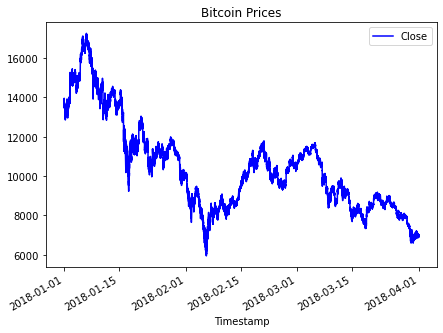

In [196]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 

bitstamp_sliced.plot(figsize=(7,5),
                    title = "Bitcoin Prices",
                    color="blue")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

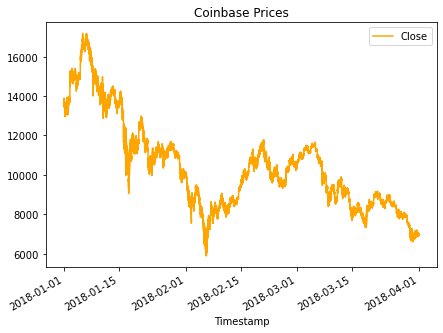

In [197]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 

coinbase_sliced.plot(figsize=(7,5),
                    title = "Coinbase Prices",
                    color="orange")

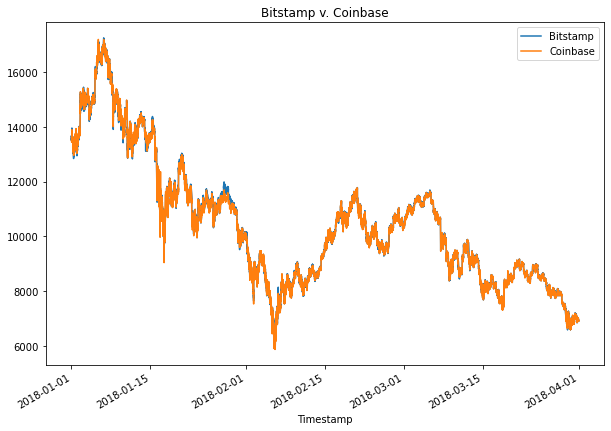

In [198]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot

ax = bitstamp_sliced.plot(figsize = (10,7),
                         title = "Bitstamp v. Coinbase",
                         legend="True")
coinbase_sliced.plot(ax=ax)
ax.legend(["Bitstamp" , "Coinbase"])

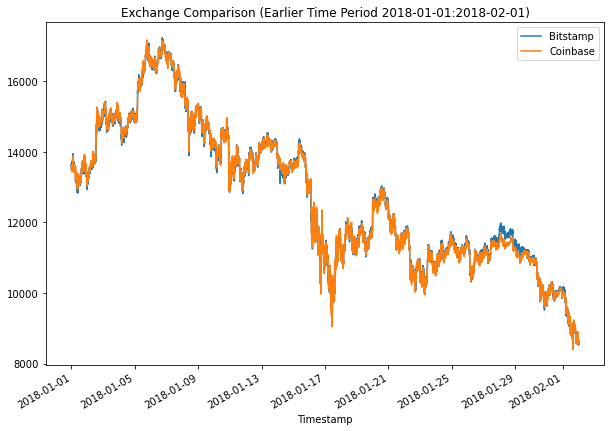

In [274]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

ax = bitstamp_sliced["Close"].loc['2018-01-01':'2018-02-01'].plot(figsize = (10,7),
                         title = "Exchange Comparison (Earlier Time Period 2018-01-01 to 2018-02-01)",
                         legend="True")
coinbase_sliced["Close"].loc['2018-01-01':'2018-02-01'].plot(ax=ax)
ax.legend(["Bitstamp" , "Coinbase"])


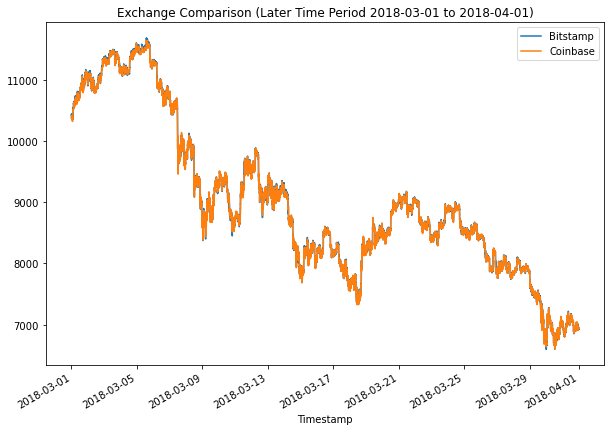

In [275]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

ax = bitstamp_sliced["Close"].loc['2018-03-01':'2018-04-01'].plot(figsize = (10,7),
                         title = "Exchange Comparison (Later Time Period 2018-03-01 to 2018-04-01)",
                         legend="True")
coinbase_sliced["Close"].loc['2018-03-01':'2018-04-01'].plot(ax=ax)
ax.legend(["Bitstamp" , "Coinbase"])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on my observations of the different time periods the degree of spread decreases as the time progressed.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

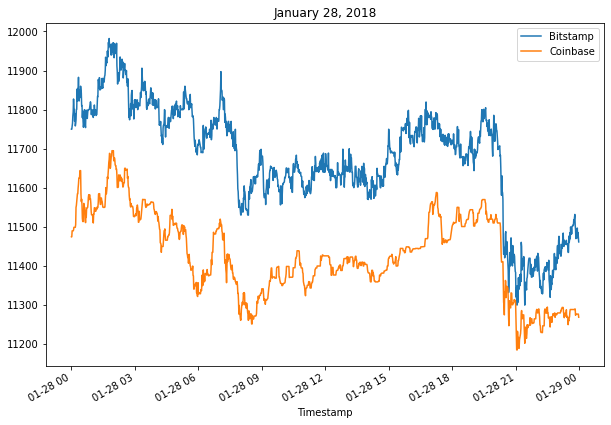

In [205]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# For 

ax = bitstamp_sliced["Close"].loc['2018-01-28'].plot(figsize = (10,7),
                         title = "January 28, 2018",
                         legend="True")
coinbase_sliced["Close"].loc['2018-01-28'].plot(ax=ax)
ax.legend(["Bitstamp" , "Coinbase"])



In [276]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early = bitstamp_sliced['Close'].loc['2018-01-28'] - coinbase_sliced['Close'].loc['2018-01-28']

# Generate summary statistics for the early DataFrame
display(print(f"\nArbitrage Spread Early for January 28, 2018\n"))
display(arbitrage_spread_early.describe())


Arbitrage Spread Early for January 28, 2018



None

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - January 28, 2018'}>

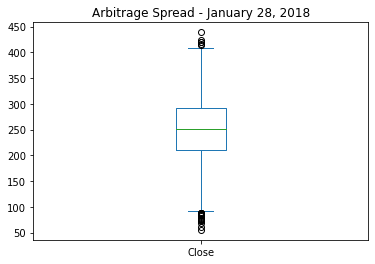

In [207]:
# Visualize the arbitrage spread from early in the dataset in a box plot

arbitrage_spread_early.plot.box(title="Arbitrage Spread - January 28, 2018")

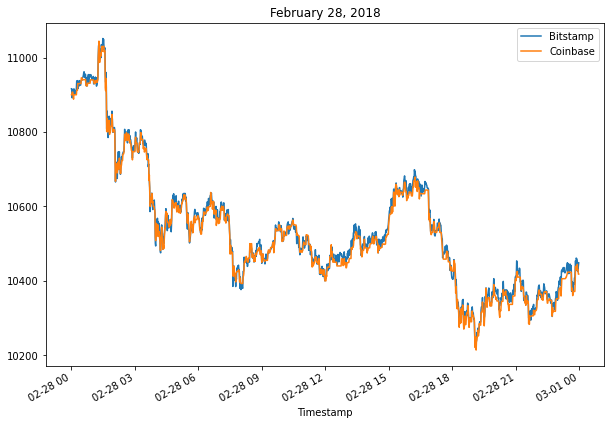

In [208]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

ax = bitstamp_sliced["Close"].loc['2018-02-28'].plot(figsize = (10,7),
                         title = "February 28, 2018",
                         legend="True")
coinbase_sliced["Close"].loc['2018-02-28'].plot(ax=ax)
ax.legend(["Bitstamp" , "Coinbase"])

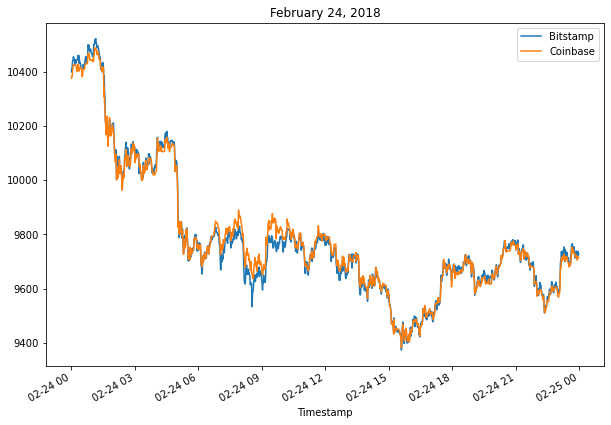

In [225]:
ax = bitstamp_sliced["Close"].loc['2018-02-24'].plot(figsize = (10,7),
                         title = "February 24, 2018",
                         legend="True")
coinbase_sliced["Close"].loc['2018-02-24'].plot(ax=ax)
ax.legend(["Bitstamp" , "Coinbase"])

In [278]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-24'] - bitstamp_sliced['Close'].loc['2018-02-24']

# Generate summary statistics 
display(print(f"\nArbitrage Spread Middle for February 24, 2018\n"))
display(arbitrage_spread_middle.describe())


Arbitrage Spread Middle for February 24, 2018



None

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - February 24, 2018'}>

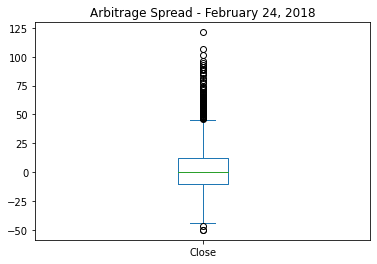

In [279]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot

arbitrage_spread_middle.plot.box(title="Arbitrage Spread - February 24, 2018")

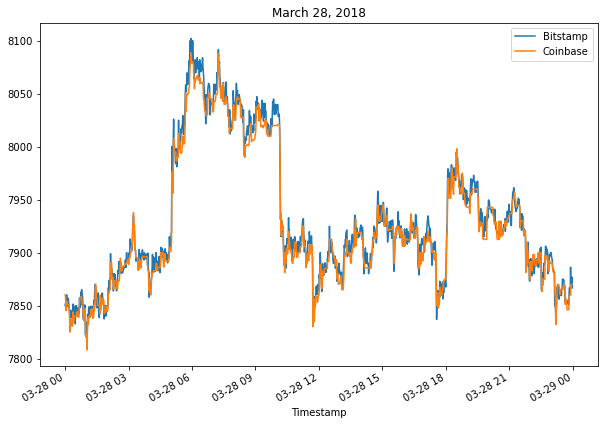

In [211]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

ax = bitstamp_sliced["Close"].loc['2018-03-28'].plot(figsize = (10,7),
                         title = "March 28, 2018",
                         legend="True")
coinbase_sliced["Close"].loc['2018-03-28'].plot(ax=ax)
ax.legend(["Bitstamp" , "Coinbase"])

In [212]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced['Close'].loc['2018-03-28'] - coinbase_sliced['Close'].loc['2018-03-28']

# Generate summary statistics for the late DataFrame
display(print(f"\nArbitrage Spread Late for March 28, 2018\n"))
arbitrage_spread_late.describe()


count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - March 28, 2018'}>

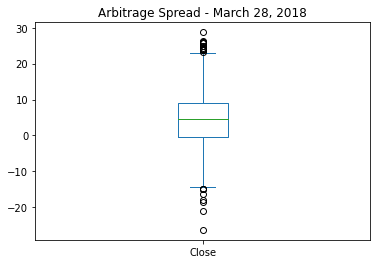

In [213]:
# Visualize the arbitrage spread from late in the dataset in a box plot

arbitrage_spread_late.plot.box(title="Arbitrage Spread - March 28, 2018")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [301]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_early = bitstamp_sliced['Close'].loc['2018-01-28'] - coinbase_sliced['Close'].loc['2018-01-28']
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-24'] - bitstamp_sliced['Close'].loc['2018-02-24']
arbitrage_spread_late = bitstamp_sliced['Close'].loc['2018-03-28'] - coinbase_sliced['Close'].loc['2018-03-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
display(print(f"\naAbitrage Spread Summary for Early - January 28, 2018\n"))
display(arbitrage_spread_early[arbitrage_spread_early > 0].describe())
display(print(f"\naAbitrage Spread Summary for Middle - February 24, 2018\n"))
display(arbitrage_spread_middle[arbitrage_spread_middle > 0].describe())
display(print(f"\naAbitrage Spread Summary for Late - March 28, 2018\n"))
display(arbitrage_spread_late[arbitrage_spread_late > 0].describe())


aAbitrage Spread Summary for Early - January 28, 2018



None

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64


aAbitrage Spread Summary for Middle - February 24, 2018



None

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64


aAbitrage Spread Summary for Late - March 28, 2018



None

count    1028.000000
mean        7.853317
std         5.521699
min         0.010000
25%         3.710000
50%         6.880000
75%        10.712500
max        28.730000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [286]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_sliced['Close'].loc['2018-01-28']
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced['Close'].loc['2018-02-24']
spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced['Close'].loc['2018-03-28']

# Review the spread return for Early, Middle and Late dates
display(print(f"\nSpread Return for early - January 28, 2018n"))
display(spread_return_early.head())
display(print(f"\nSpread Return for middle - Febraury 24, 2018\n"))
display(spread_return_middle.head())
display(print(f"\nSpread Return for late - March 28, 2018n"))
display(spread_return_late.head())



Spread Return for early - January 28, 2018n


None

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64


Spread Return for middle - Febraury 24, 2018



None

Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
Name: Close, dtype: float64


Spread Return for late - March 28, 2018n


None

Timestamp
2018-03-28 00:00:00         NaN
2018-03-28 00:01:00         NaN
2018-03-28 00:02:00         NaN
2018-03-28 00:03:00    0.001122
2018-03-28 00:04:00    0.000778
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [288]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Review the first five profitable trades
display(print(f"\nProfitable Trades for early - January 28, 2018\n"))
display(profitable_trades_early.head())
display(print(f"\nProfitable Trades for middle - Febrauary 24, 2018\n"))
display(profitable_trades_middle.head())
display(print(f"\nProfitable Trades for late - March 28, 2018\n"))
display(profitable_trades_late.head())



Profitable Trades for early - January 28, 2018



None

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64


Profitable Trades for middle - Febrauary 24, 2018



None

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64


Profitable Trades for late - March 28, 2018



None

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [290]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(print(f"\nProfitable Trades for early - January 28, 2018\n"))
display(profitable_trades_early.describe())
display(print(f"\nProfitable Trades for middle - February 24, 2018\n"))
display(profitable_trades_middle.describe())
display(print(f"\nProfitable Trades for late - March 28, 2018\n"))
display(profitable_trades_late.describe())


Profitable Trades for early - January 28, 2018



None

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64


Profitable Trades for middle - February 24, 2018



None

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64


Profitable Trades for late - March 28, 2018



None

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### Average returns among the three dates comparison
1. The average profitable trades on January 28, 2018 is **2.2%** which is the largest/highest among all three dates.
2. The average profitable trades on February 24, 2018 is **1.1%** which is still good compared to March.
3. There is no profitable trades on March 28,2018.

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [302]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced['Close'].loc['2018-01-28']
profit_middle = profitable_trades_middle * bitstamp_sliced['Close'].loc['2018-02-24']
profit_late = profitable_trades_late * coinbase_sliced['Close'].loc['2018-03-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the profit DataFrame

display(print(f"\nProfit for Early - January 28, 2018\n"))
display(profit_early.tail())
display(print(f"\nProfit for Middle - February 24, 2018\n"))
display(profit_middle.tail())
display(print(f"\nProfit for late - March 28, 2018\n"))
display(profit_late.tail())



Profit for Early - January 28, 2018



None

Timestamp
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, dtype: float64


Profit for Middle - February 24, 2018



None

Timestamp
2018-02-24 23:55:00   NaN
2018-02-24 23:56:00   NaN
2018-02-24 23:57:00   NaN
2018-02-24 23:58:00   NaN
2018-02-24 23:59:00   NaN
Name: Close, dtype: float64


Profit for late - March 28, 2018



None

Timestamp
2018-03-28 23:55:00   NaN
2018-03-28 23:56:00   NaN
2018-03-28 23:57:00   NaN
2018-03-28 23:58:00   NaN
2018-03-28 23:59:00   NaN
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [294]:
# Generate the summary statistics for the early profit per trade DataFrame

display(print(f"\nProfit Per Trade for Early - January 28, 2018\n"))
display(profit_per_trade_early.describe())
display(print(f"\nProfit Per Trade for Middle - February 24, 2018\n"))
display(profit_per_trade_middle.describe())
display(print(f"\nProfit Per Trade for late - March 28, 2018\n"))
display(profit_per_trade_late.describe())


Profit Per Trade for Early - January 28, 2018



None

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64


Profit Per Trade for Middle - February 24, 2018



None

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64


Profit Per Trade for late - March 28, 2018



None

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date(January 28, 2018)'}, xlabel='Timestamp'>

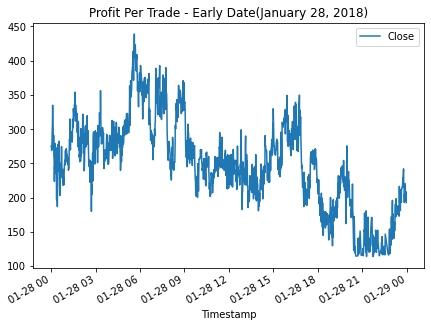

In [295]:
# Plot the results for the early profit per trade DataFrame

profit_per_trade_early.plot(title="Profit Per Trade - Early Date(January 28, 2018)",
                           figsize=(7,5),
                                legend="True")

<AxesSubplot:title={'center':'Profit Per Trade - Middle Date(February 24, 2018)'}, xlabel='Timestamp'>

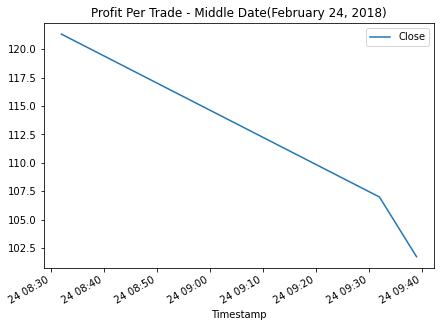

In [296]:
# Plot the results for the Middle profit per trade DataFrame

profit_per_trade_middle.plot(title="Profit Per Trade - Middle Date(February 24, 2018)",
                           figsize=(7,5),
                                legend="True")

<AxesSubplot:title={'center':'Profit Per Trade - Late Date(March 28, 2018)'}, xlabel='Timestamp'>

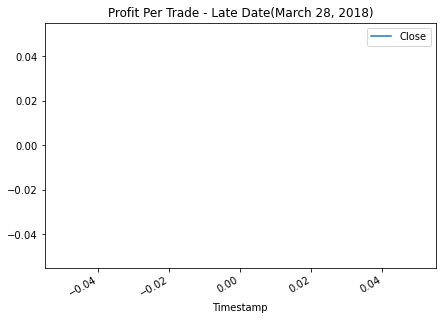

In [297]:
# Plot the results for the Late profit per trade DataFrame

profit_per_trade_late.plot(title="Profit Per Trade - Late Date(March 28, 2018)",
                           figsize=(7,5),
                                legend="True")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [298]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame

arbitrage_early = profit_per_trade_early.sum()
display(print(f"Arbitrage Profit for January 28, 2018 - ",arbitrage_early))

Arbitrage Profit for January 28, 2018 -  349918.2900000001


None

In [299]:
arbitrage_middle = profit_per_trade_middle.sum()
display(print(f"Arbitrage Profit for February 24, 2018 - ",arbitrage_middle))

Arbitrage Profit for February 24, 2018 -  330.0699999999997


None

In [300]:
arbitrage_late = profit_per_trade_late.sum()
display(print(f"Arbitrage Profit for March 28, 2018 - ",arbitrage_late))

Arbitrage Profit for March 28, 2018 -  0.0


None

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [264]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame

cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Cumulative Sum - Early Date(January 28, 2018)'}, xlabel='Timestamp'>

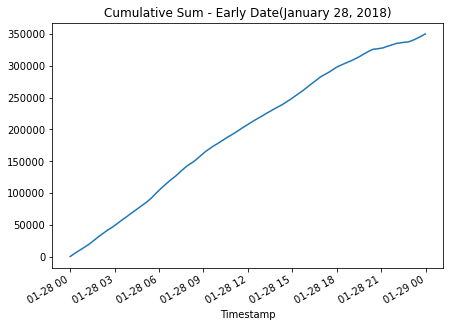

In [265]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title="Cumulative Sum - Early Date(January 28, 2018)",
                            figsize=(7,5))

<AxesSubplot:title={'center':'Cumulative Sum - Middle Date(February 24, 2018)'}, xlabel='Timestamp'>

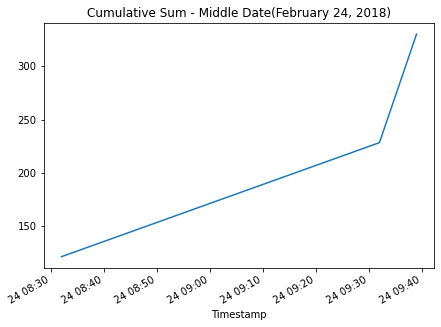

In [266]:
cumulative_profit_middle.plot(title="Cumulative Sum - Middle Date(February 24, 2018)",
                            figsize=(7,5))

<AxesSubplot:title={'center':'Cumulative Sum - Late Date(March 28, 2018)'}, xlabel='Timestamp'>

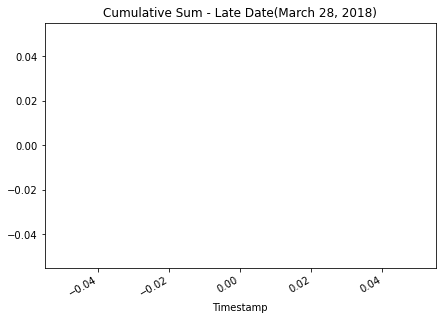

In [267]:
cumulative_profit_late.plot(title="Cumulative Sum - Late Date(March 28, 2018)",
                            figsize=(7,5))

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** 
1. The arbitrage profit opportunities for Early period(January 28, 2018) is more compared to the remaning periods. The arbitrage is calculated by assuming that we buy from coinbase and sell on bitstamp market.
2. Though there is a arbitrage profit of 330.07 that occured during middle period (February 24, 2018 assuming that we buy from bitstamp and sell in coinbase) there is very less opportunity than the early period.
3. There are no profitable arbitrage trades in the late period(March 28,2018 assuming that we buy from coinbase and sell on bitstamp market).
4. From this trend we understand that after the early arbitrage trend which attracted more people to buy from coinbase and sell in bitstamp which inturn shrinked the potential for arbitrage profits to occur in future hence the less profit in middle period and virtually no profit in the later period.
5. Thus the price of bitcoin became stable across both the Exchanges.